In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
dataset = pd.read_csv("data.csv")

label_encoder = LabelEncoder()
dataset["diagnosis"] = label_encoder.fit_transform(dataset["diagnosis"])

X = dataset.iloc[:, 2:].values
y = dataset["diagnosis"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Confusion Matrix:
[[86  4]
 [ 2 51]]
Accuracy: 0.96


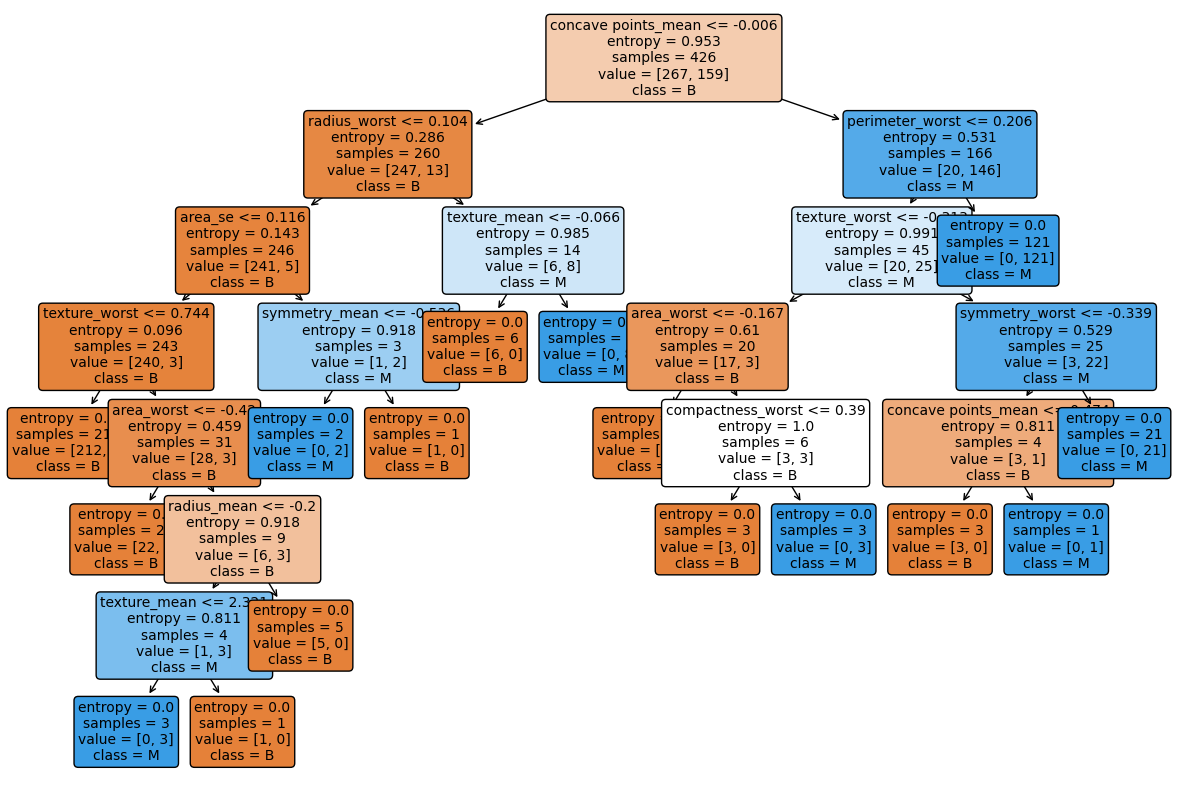

In [27]:
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.2f}")
plt.figure(figsize=(15, 10))
plot_tree(classifier,filled=True,feature_names=dataset.columns[2:],class_names=["B", "M"],rounded=True,fontsize=10,)
plt.show()